In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [4]:
# Load predictions from the CSV file
predictions_file = "C:/Data/Python/IFCBclassify_MN/data/models/model_20240706_023737/predictions_with_blobs.csv"
predictions_df = pd.read_csv(predictions_file)

# Compute basic statistics
mean_prob = predictions_df['probability'].mean()
std_prob = predictions_df['probability'].std()
print(f"Mean Prediction Probability: {mean_prob:.2f}")
print(f"Standard Deviation of Prediction Probabilities: {std_prob:.2f}")


Mean Prediction Probability: 0.80
Standard Deviation of Prediction Probabilities: 0.19


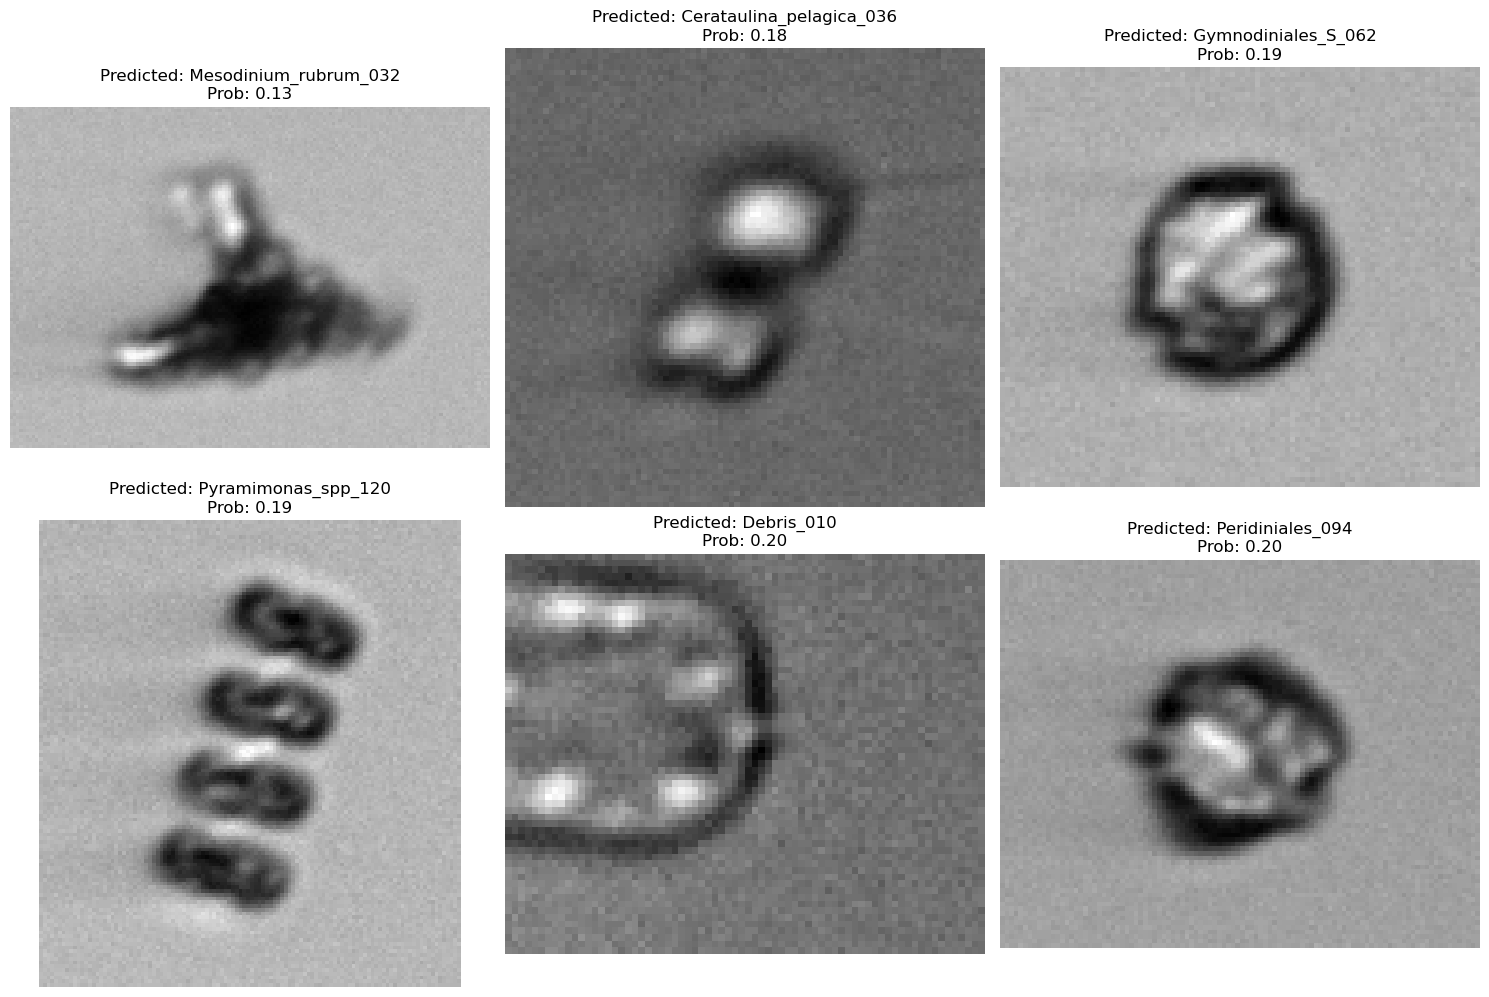

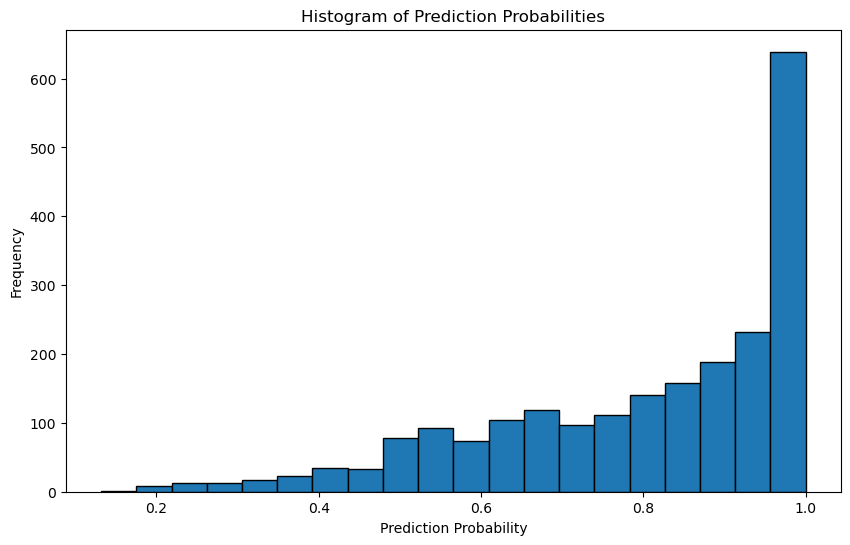

In [5]:

# Identify the 6 most uncertain predictions (lowest probabilities)
most_uncertain_images = predictions_df.nsmallest(6, 'probability')

# Plot the 6 most uncertain images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (_, row) in enumerate(most_uncertain_images.iterrows()):
    image_path = Path("C:/Data/Python/IFCB/data/D20240628") / row['image_name']
    image = Image.open(image_path)
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Predicted: {row['predicted_class']}\nProb: {row['probability']:.2f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Plot histogram of prediction probabilities
plt.figure(figsize=(10, 6))
plt.hist(predictions_df['probability'], bins=20, edgecolor='black')
plt.title('Histogram of Prediction Probabilities')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.show()

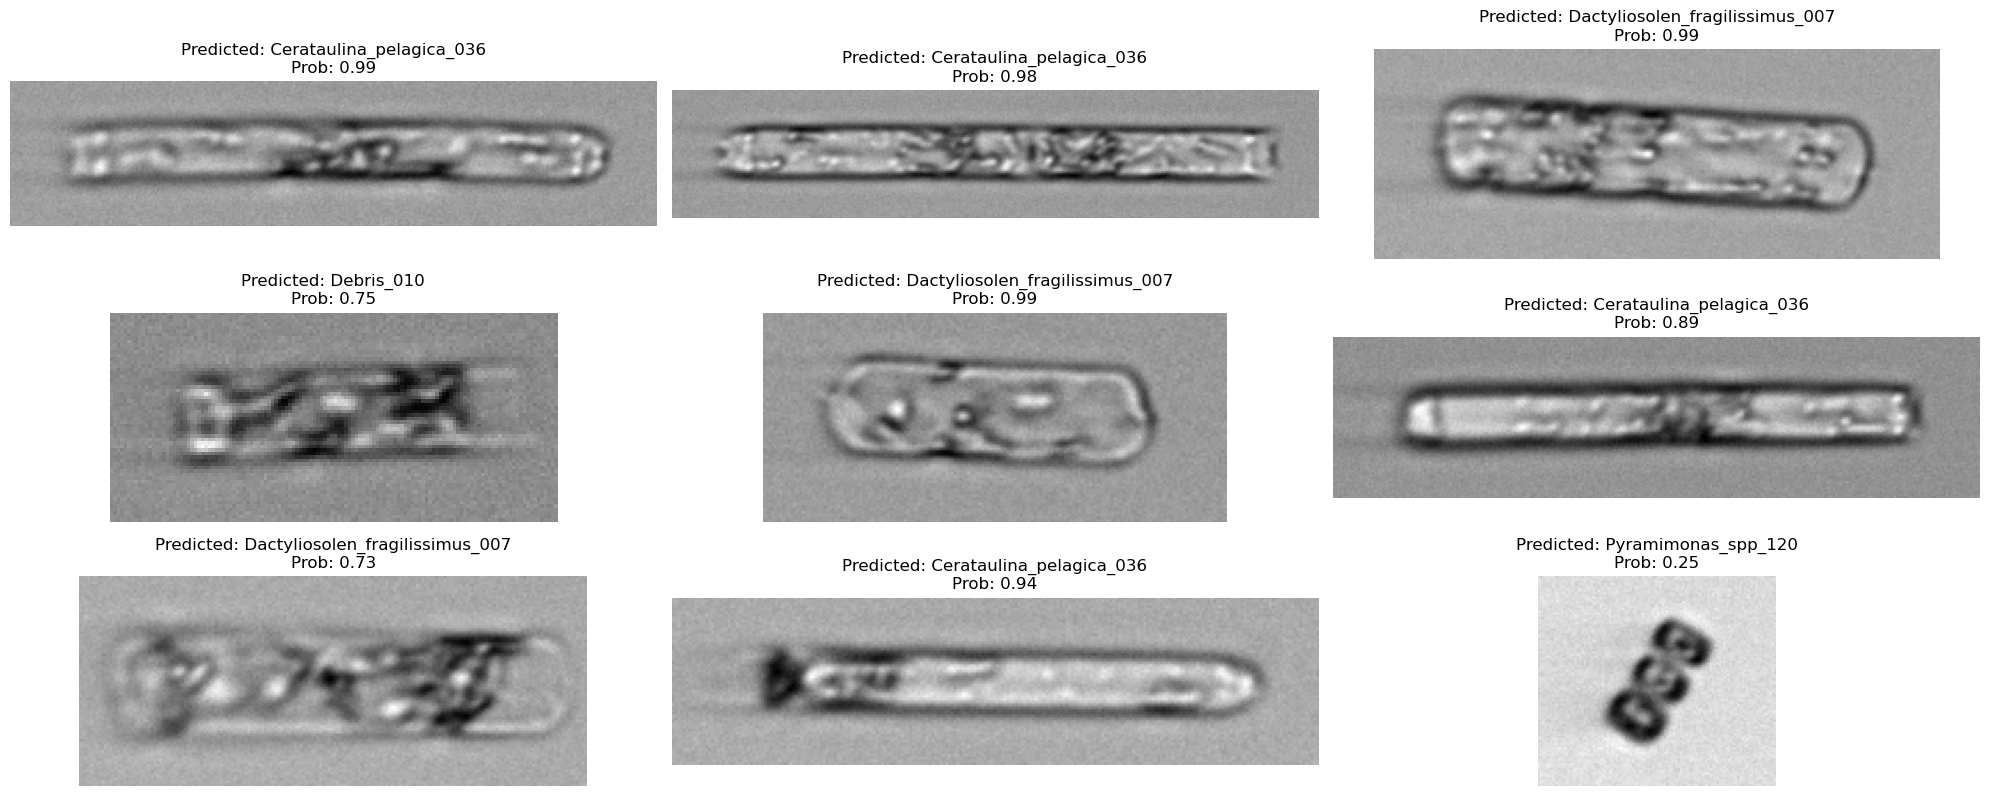

In [6]:
# Select 10 random images
random_images = predictions_df.sample(n=9)

# Plot the 10 random images
fig, axes = plt.subplots(3, 3, figsize=(20, 8))
axes = axes.ravel()

for i, (_, row) in enumerate(random_images.iterrows()):
    image_path = Path("C:/Data/Python/IFCB/data/D20240628") / row['image_name']
    image = Image.open(image_path)
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Predicted: {row['predicted_class']}\nProb: {row['probability']:.2f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

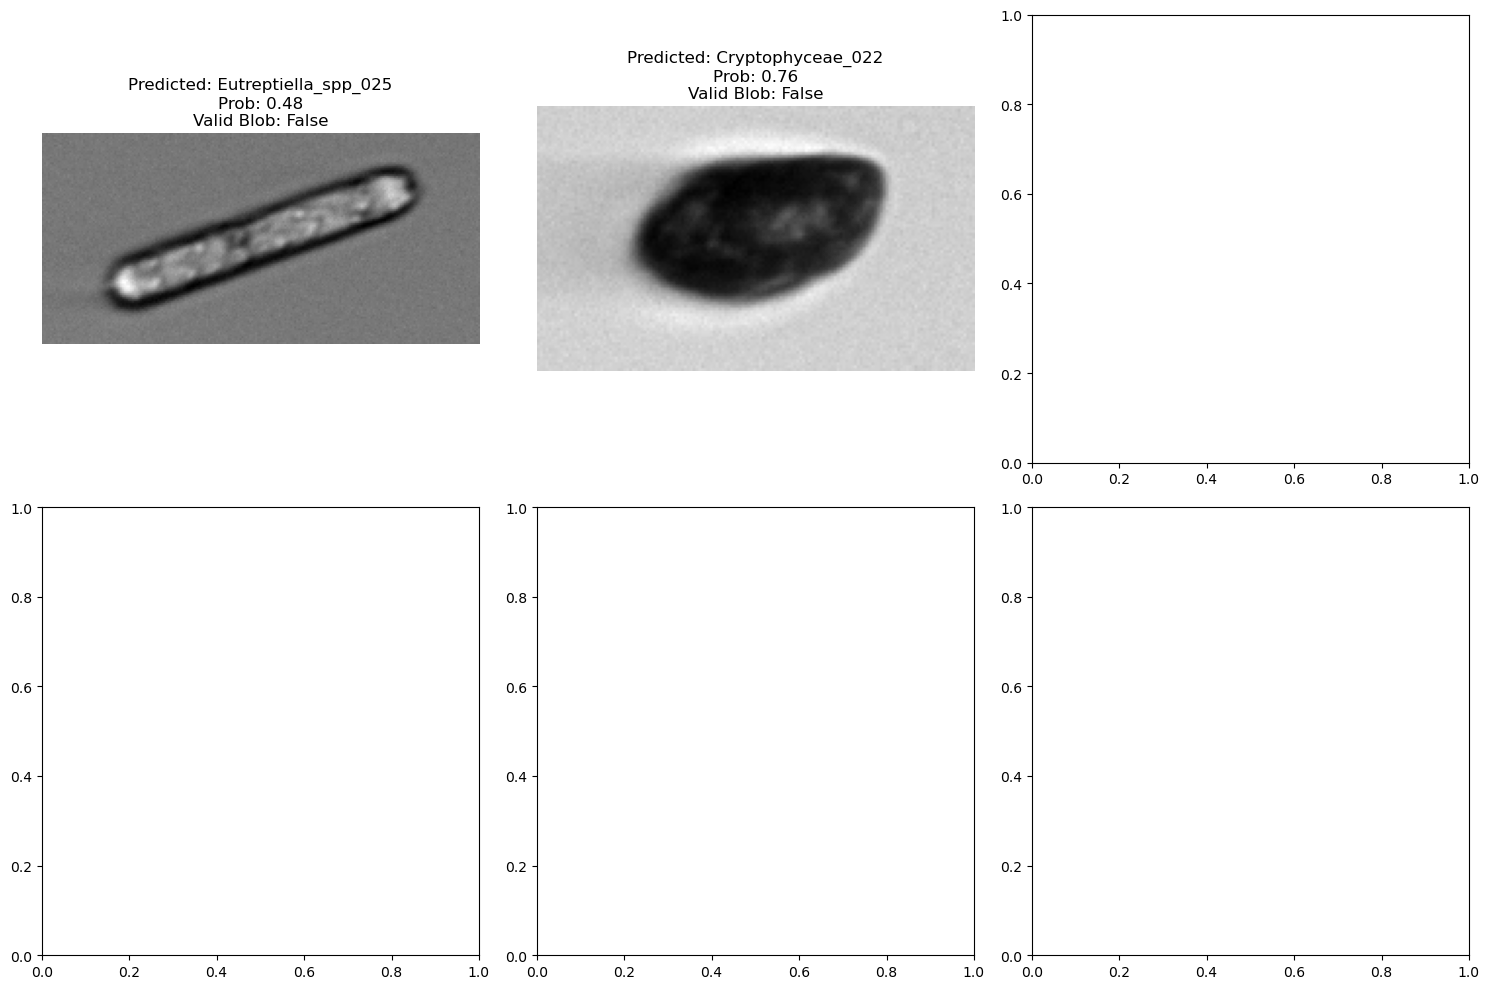

In [7]:
# Filter and display images where valid_blob is False
#Integrate this validation step into the prediction pipeline 
#so that invalid predictions are flagged or corrected in real-time.

invalid_blob_images = predictions_df[predictions_df['valid_blob'] == False]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (_, row) in enumerate(invalid_blob_images.head(6).iterrows()):
    image_path = Path("C:/Data/Python/IFCB/data/D20240628") / row['image_name']
    image = Image.open(image_path)
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Predicted: {row['predicted_class']}\nProb: {row['probability']:.2f}\nValid Blob: {row['valid_blob']}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [8]:
import os
import shutil
import pandas as pd
from pathlib import Path

# # Load predictions from the CSV file
# predictions_file = "C:/Data/Python/IFCBclassify_MN/data/models/model_20240624_154622/predictions2.csv"
# predictions_df = pd.read_csv(predictions_file)

# Class you want to filter by
target_class = "Dictyocha_fibula_014"

# Filter the DataFrame to get the images predicted as the target class
target_images = predictions_df[predictions_df['predicted_class'] == target_class]

# Define the source and destination directories
source_dir = Path("C:/Data/Python/IFCB/data/D20240628")
destination_dir = Path(f"C:/Data/Python/IFCB/data/{target_class}")
destination_dir.mkdir(parents=True, exist_ok=True)

# Copy the images to the destination directory
for image_name in target_images['image_name']:
    src = source_dir / image_name
    dst = destination_dir / image_name
    shutil.copy(src, dst)

print(f"Copied {len(target_images)} images to {destination_dir}")

Copied 0 images to C:\Data\Python\IFCB\data\Dictyocha_fibula_014


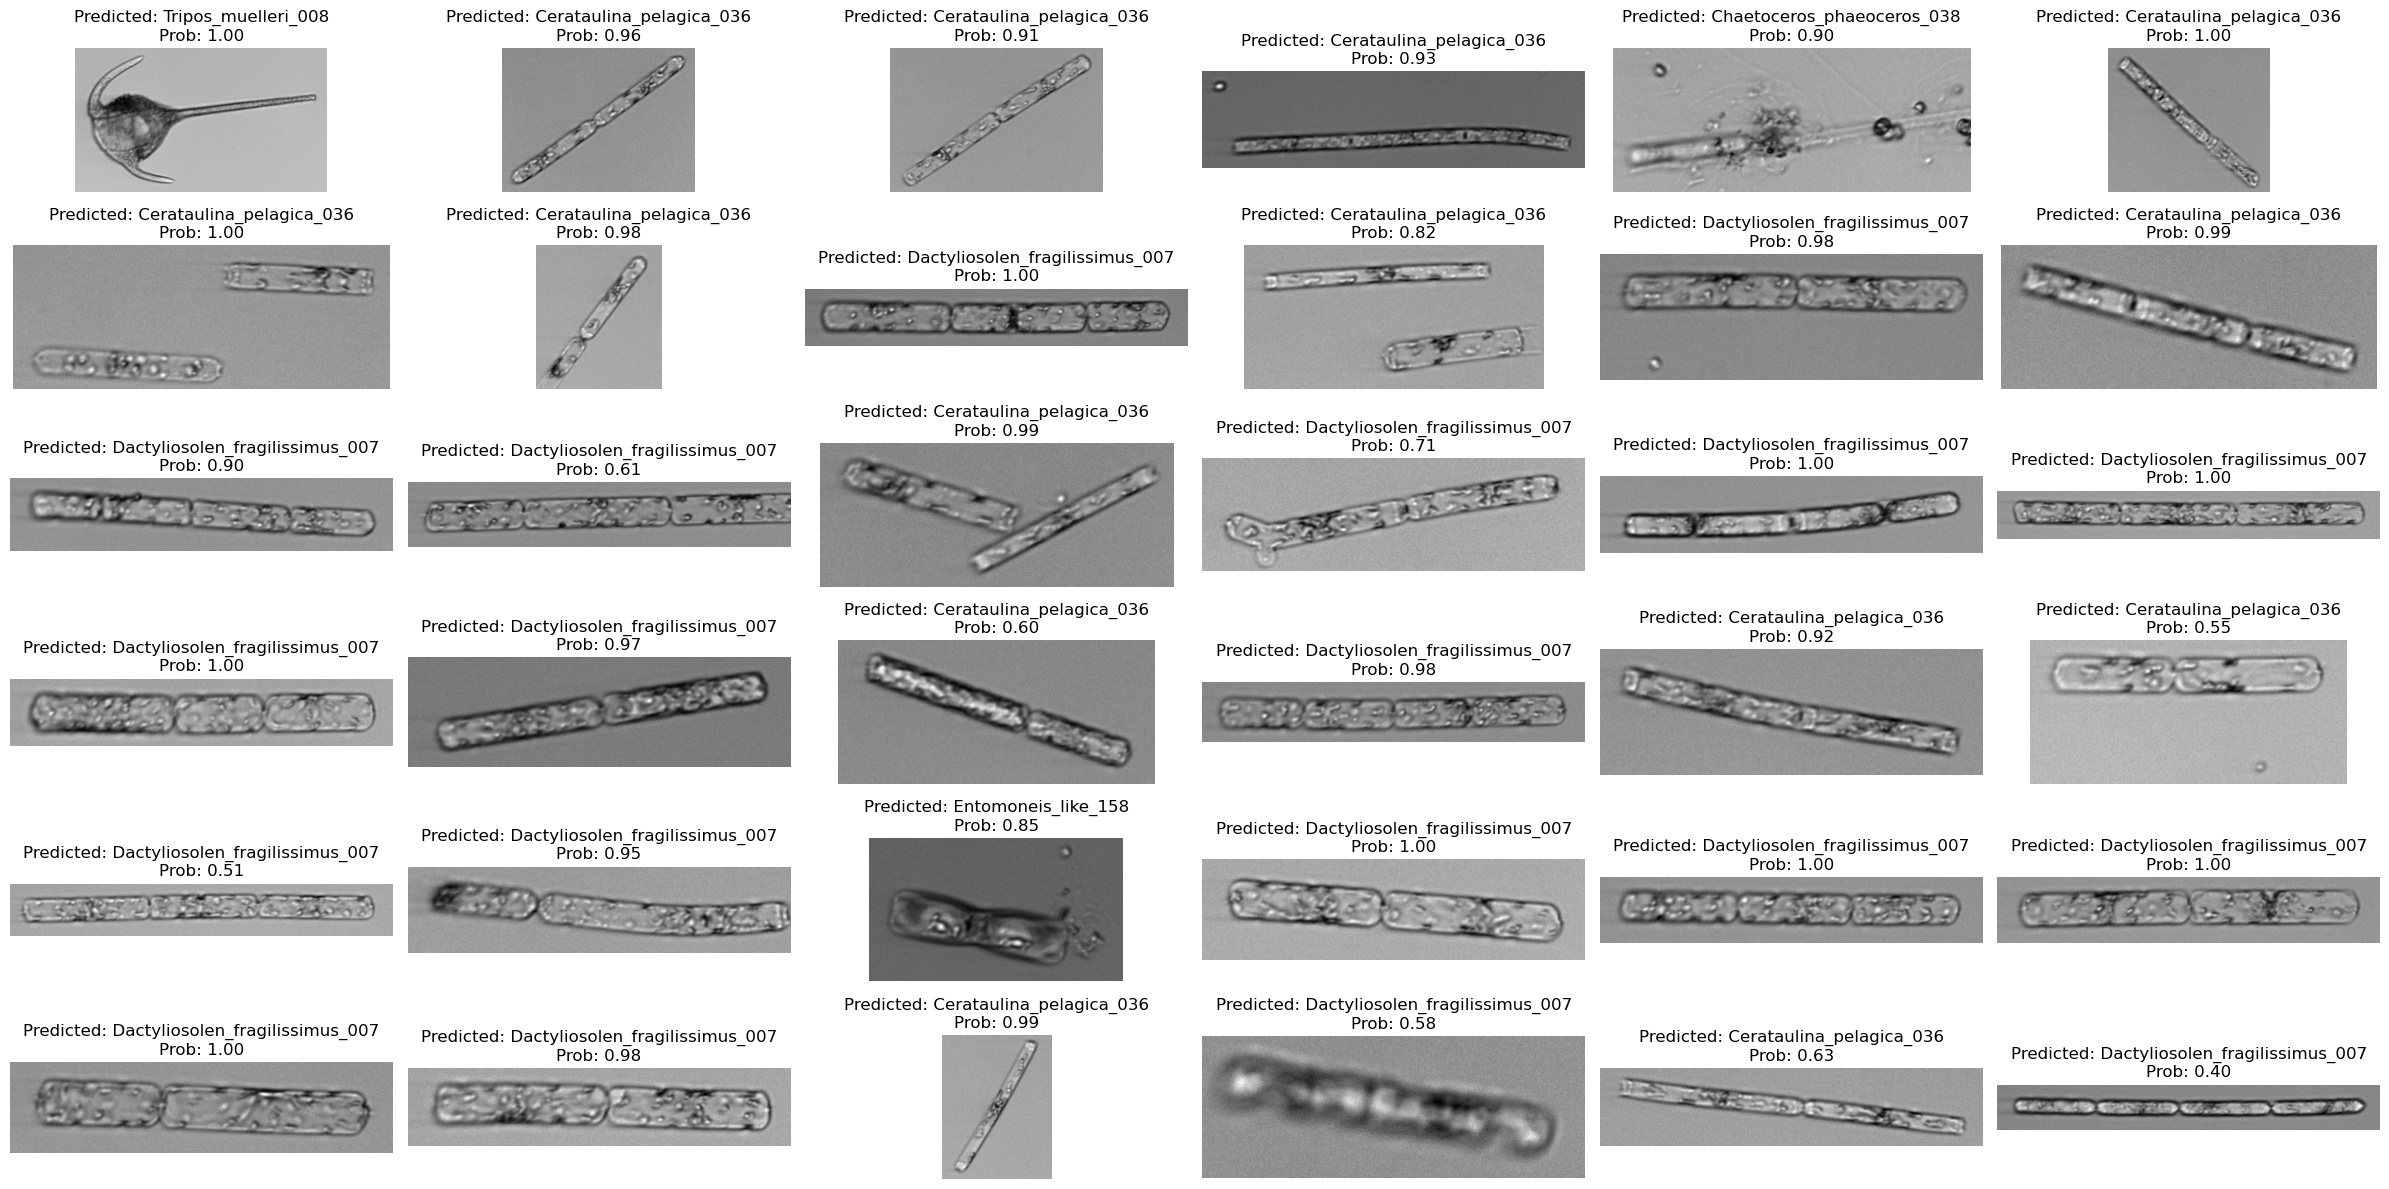

In [9]:

# Get the file sizes
image_folder = Path("C:/Data/Python/IFCB/data/D20240628")
predictions_df['file_size'] = predictions_df['image_name'].apply(lambda x: (image_folder / x).stat().st_size)

# Sort by file size and select the 18 largest
largest_images = predictions_df.sort_values(by='file_size', ascending=False).head(36)

# Plot the 18 largest images
fig, axes = plt.subplots(6, 6, figsize=(24, 12))
axes = axes.ravel()

for i, (_, row) in enumerate(largest_images.iterrows()):
    image_path = image_folder / row['image_name']
    image = Image.open(image_path)
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Predicted: {row['predicted_class']}\nProb: {row['probability']:.2f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

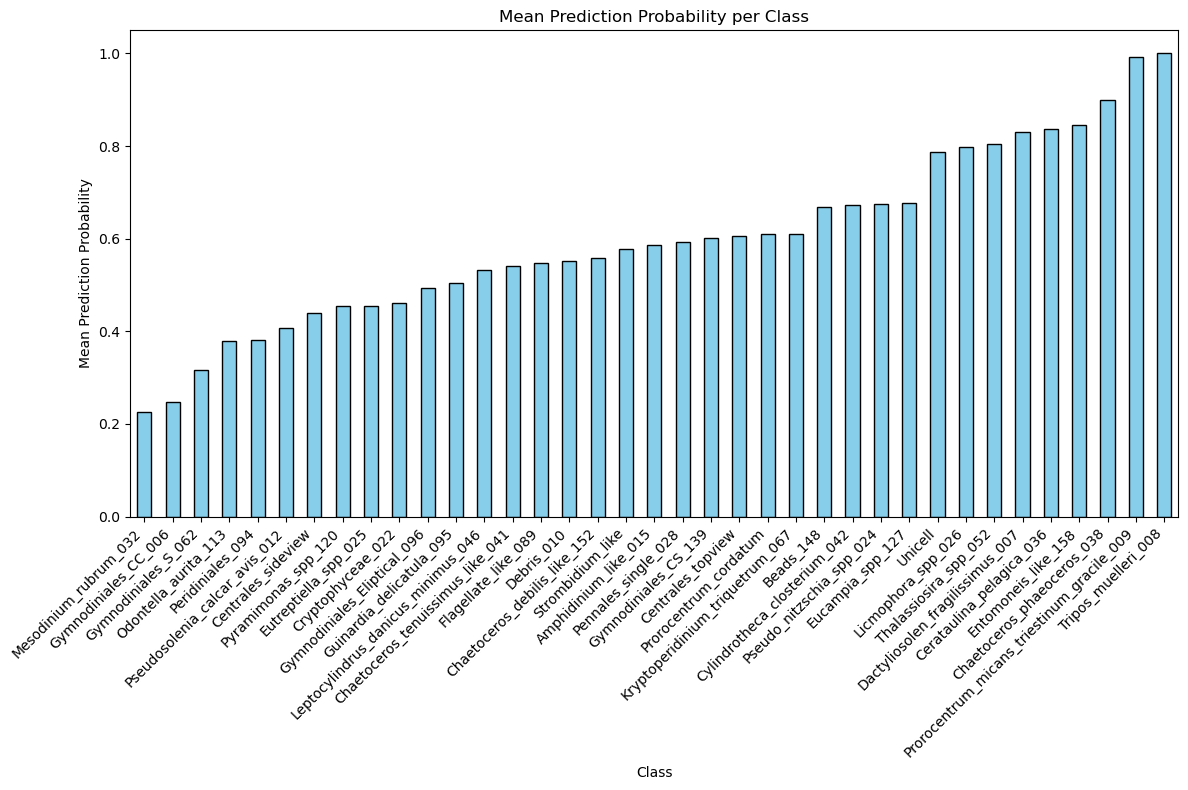

In [10]:
# Compute prediction probabilities per class
class_probabilities = predictions_df.groupby('predicted_class')['probability'].mean().sort_values()

# Plot prediction probabilities per class
plt.figure(figsize=(12, 8))
class_probabilities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Prediction Probability per Class')
plt.xlabel('Class')
plt.ylabel('Mean Prediction Probability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()